# Exploratory Data Analysis on Global Terrorism

## The Sparks Foundation

### Author-  Aditi Teli

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data

df = pd.read_csv("Global Terrorism - START data.zip",encoding="latin-1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# Checking the shape of the data

df.shape

(181691, 135)

In [5]:
# Looking for all the columns:

print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

There are around 100000+ rows and 135 columns in the dataset. There can be certain columns which are redundant and they create unnecessary noise in the data.Only columns that we feel are necessary such as year,month,day,country,state,region,city,Attack type,etc which are crucial for the analysis needs to be kept.

As we can see that since there are many columns in the dataset, all columns are not displayed. Also columns such as "iyear" should be replaced with another name as "Year". Same goes to all other columns whose names are not proper, they are need to be replaced with proper names.

In [6]:
# Renaming the column names which are not defined correctly:

df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day",'country_txt':"Country","provstate":"State",
                   "region_txt":"Region","attacktype1_txt":"Attacktype","target1":"target","nkill":"Killed",
                    "nwound":"Wounded","gname":"Group","targtype1_txt":"target_type","weaptype1_txt":"Weapon_type"},inplace=True)

In [7]:
print(df.columns.tolist())

['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended', 'resolution', 'country', 'Country', 'region', 'Region', 'State', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'Attacktype', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'target_type', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'Group', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', '

In [8]:
# We will pick the selective columns which are important for our analysis:

df1 = df[["Year","Month","Day","Country","State","Region",'city','latitude', 'longitude','Attacktype',"Killed","Wounded",
         "target","summary","Group","target_type","Weapon_type"]]

In [9]:
df1.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attacktype,Killed,Wounded,target,summary,Group,target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary


In [11]:
# Checking the information of the data:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attacktype   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  target       181055 non-null  object 
 13  summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [12]:
# Looking at the unique values in the data:

for i in df1.columns:
    print(i,df1[i].nunique())

Year 47
Month 13
Day 32
Country 205
State 2855
Region 12
city 36674
latitude 48322
longitude 48039
Attacktype 9
Killed 205
Wounded 238
target 86006
summary 112492
Group 3537
target_type 22
Weapon_type 12


In [13]:
# Checking for the percentage of null values in the dataset:

(df1.isnull().sum()/len(df1)*100)

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
State           0.231712
Region          0.000000
city            0.238867
latitude        2.507554
longitude       2.508104
Attacktype      0.000000
Killed          5.676120
Wounded         8.977330
target          0.350045
summary        36.396409
Group           0.000000
target_type     0.000000
Weapon_type     0.000000
dtype: float64

In [14]:
# There are more null values in the Weapon and Killed column:

df1["Wounded"] = df["Wounded"].fillna(0).astype(int)
df1["Killed"] = df["Killed"].fillna(0).astype(int)

In [15]:
# Describing the data:

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,2002.638997,13.259430,1.970000e+03,1991.000000,2009.000000,2014.000000,2017.000000
Month,181691.0,6.467277,3.388303,0.000000e+00,4.000000,6.000000,9.000000,12.000000
Day,181691.0,15.505644,8.814045,0.000000e+00,8.000000,15.000000,23.000000,31.000000
latitude,177135.0,23.498343,18.569242,-5.315461e+01,11.510046,31.467463,34.685087,74.633553
longitude,177134.0,-458.695653,204778.988611,-8.618590e+07,4.545640,43.246506,68.710327,179.366667
Killed,181691.0,2.266860,11.227057,0.000000e+00,0.000000,0.000000,2.000000,1570.000000
Wounded,181691.0,2.883291,34.309746,0.000000e+00,0.000000,0.000000,2.000000,8191.000000


## Univariate analysis of the dataset

In [16]:
# Analysing the Attack Types:

(df1["Attacktype"].value_counts())

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

Observation : From the above information we could observe that Bombing/Explosion attack type is more, followed by armed assault and so on.

Text(0.5, 1.0, 'Attack Types')

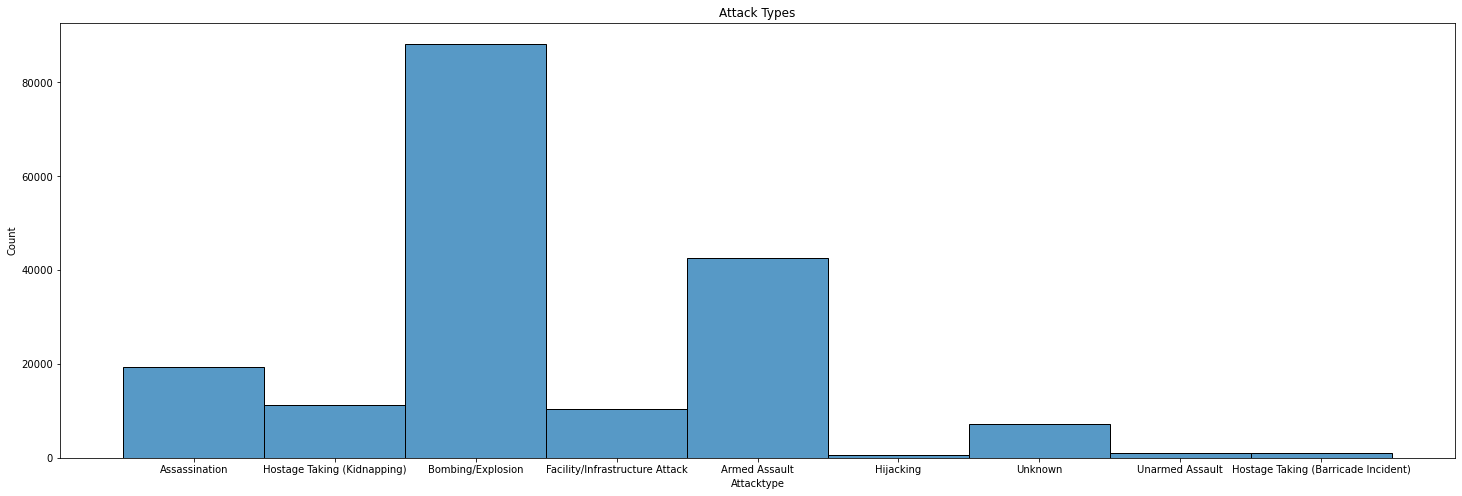

In [17]:
# To understand this better we will plot a countplot for the same:

plt.figure(figsize=(25,8))
sns.histplot(df1["Attacktype"],palette="cubehellx")
plt.title("Attack Types")

In [18]:
# Countries that are affected by terrorism:

df1["Country"].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

There are so many countries to analyse in the dataset. Let us take top ten countries that are affected by terrorism. 

In [19]:
df1["Country"].value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

Text(0, 0.5, 'Counts')

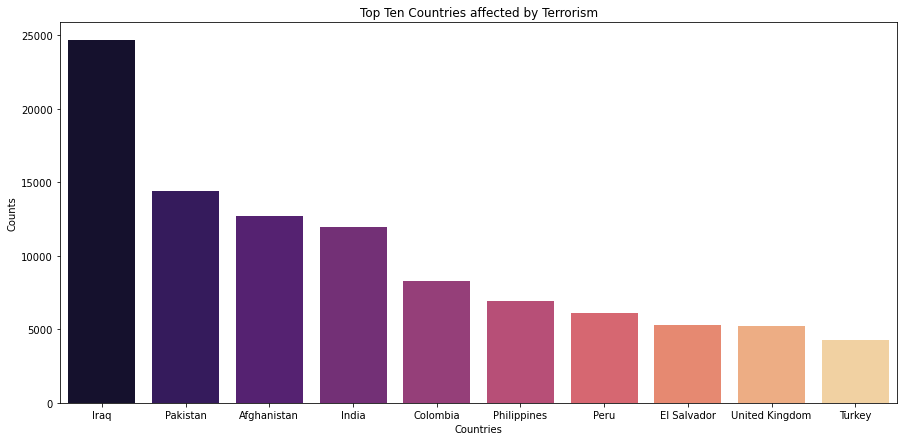

In [20]:
# Plotting this information graphically:

plt.figure(figsize=(15,7))
sns.barplot(df1["Country"].value_counts()[:10].index,df1["Country"].value_counts()[:10].values,palette="magma")
plt.title("Top Ten Countries affected by Terrorism")
plt.xlabel("Countries")
plt.ylabel("Counts")

Observation : Iraq is the most affected by terrorism, followed by Pakistan, Afghanistan and so on.

In [21]:
# Attack targets:

df1["target_type"].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: target_type, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Private Citizens & Property'),
  Text(1, 0, 'Military'),
  Text(2, 0, 'Police'),
  Text(3, 0, 'Government (General)'),
  Text(4, 0, 'Business'),
  Text(5, 0, 'Transportation'),
  Text(6, 0, 'Utilities'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Religious Figures/Institutions'),
  Text(9, 0, 'Educational Institution')])

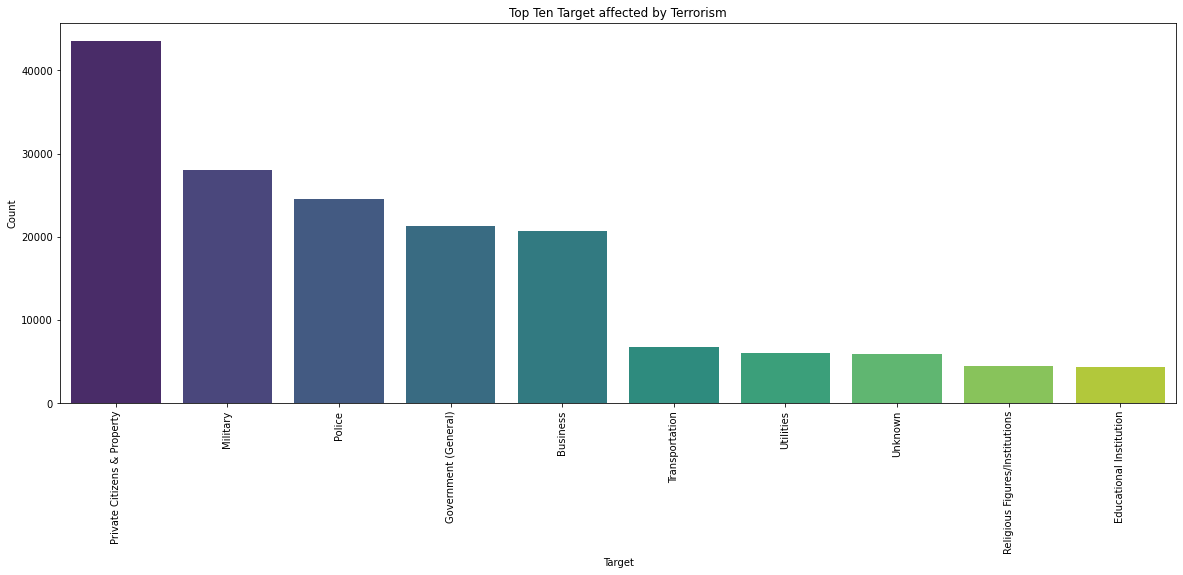

In [22]:
# Plotting this information graphically:

plt.figure(figsize=(20,7))
sns.barplot(df1["target_type"].value_counts()[:10].index,df1["target_type"].value_counts()[:10].values,palette="viridis")
plt.title("Top Ten Target affected by Terrorism")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks(rotation=90)

Observation: The most targeted people are Private citizens and property,followed by military,police and so on.

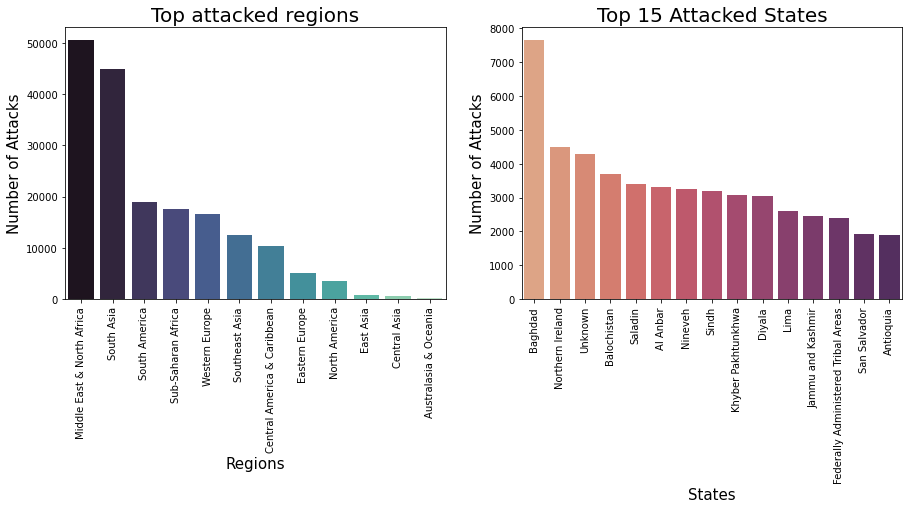

In [23]:
# Regions that were attacked the most:

plt.subplot(1,2,1)
sns.barplot(df1['Region'].value_counts().index, df1["Region"].value_counts().values,palette='mako')
plt.title('Top attacked regions',fontsize=20)
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)


# States that were attacked the most
plt.subplot(1,2,2)
sns.barplot(df1['State'].value_counts().head(15).index,df1['State'].value_counts().head(15).values,palette='flare')
plt.title('Top 15 Attacked States',fontsize=20)
plt.xlabel('States',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

     Observation:1. Top attacked regions are Middle East & North Africa followed by South Asia
                 2. The top attacked state is Baghdad followed by Northern Ireland

In [24]:
# Type of weapon used:

(df1["Weapon_type"].value_counts()/len(df1))*100

Explosives                                                                     50.869883
Firearms                                                                       32.210731
Unknown                                                                         8.342185
Incendiary                                                                      6.128537
Melee                                                                           2.011657
Chemical                                                                        0.176674
Sabotage Equipment                                                              0.077604
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     0.074852
Other                                                                           0.062744
Biological                                                                      0.019263
Fake Weapons                                                                    0.018163
Radiological         

Text(0, 0.5, 'Count')

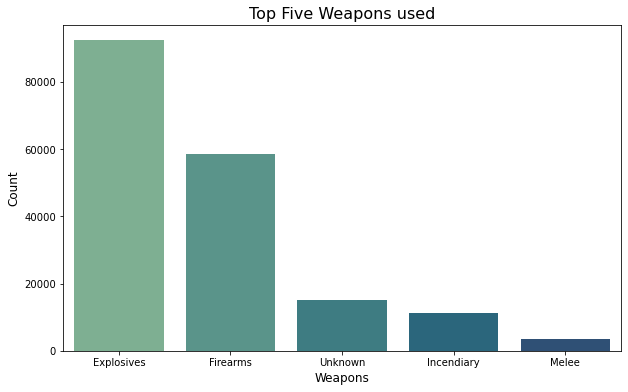

In [25]:
# Plotting the barplot of the top 5 weapons used by the terrorist:

plt.figure(figsize=(10,6))
sns.barplot(df1["Weapon_type"].value_counts()[:5].index,df1["Weapon_type"].value_counts()[:5].values,palette="crest")
plt.title("Top Five Weapons used",fontsize=16)
plt.xlabel("Weapons",fontsize=12)
plt.ylabel("Count",fontsize=12)

Observation: Explosives and Firearms are used more wherein 51% is of explosives and around 32% firearms.

Text(0.5, 1.0, 'Years of attack')

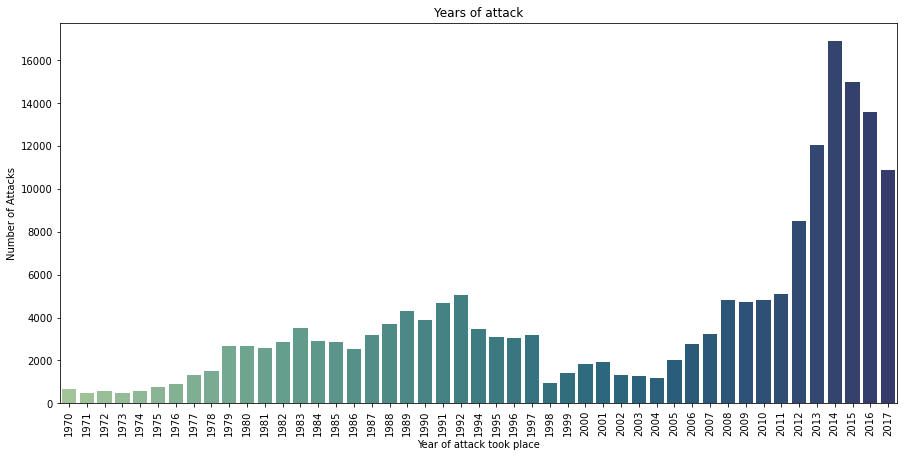

In [26]:
# Analysing the number of attacks that took place every year

years = df1['Year'].unique()
count_of_years = df1['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,7))
sns.barplot(x = years,y = count_of_years,palette = 'crest')
plt.xticks(rotation = 90)
plt.xlabel('Year of attack took place')
plt.ylabel('Number of Attacks')
plt.title('Years of attack')

Observation : More number of attacks have taken place after 2012.

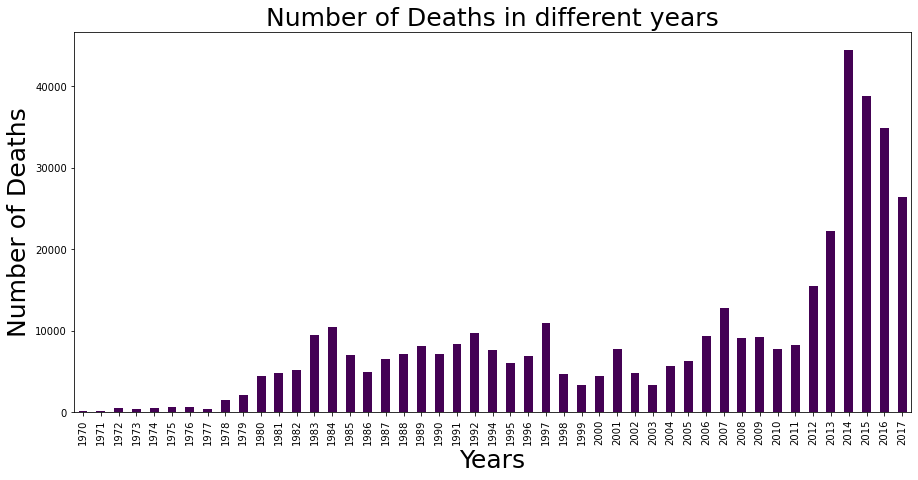

In [27]:
# Analysing the number of deaths taken place in each year.

plt.figure(figsize = (15,7))
df1.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap="viridis")
plt.title('Number of Deaths in different years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Deaths',fontsize=25)
plt.xticks(rotation=90)
plt.show()

Observation: The number of deaths have increased after 2013. More than 25000+ people died in the attack.

## Bivariate analysis

#### 1. Region-wise analysis

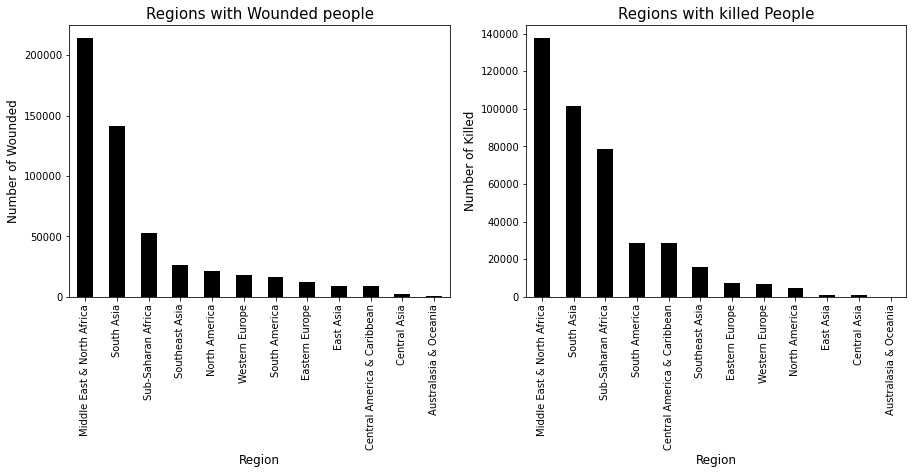

In [28]:
# Analysing the Number of people wounded by region:

plt.subplot(1,2,1)
df1.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).plot(kind='bar',colormap='cubehelix')
plt.title('Regions with Wounded people',fontsize=15)
plt.xlabel('Region',fontsize=12)
plt.ylabel('Number of Wounded',fontsize=12)
plt.xticks(rotation=90)


# Analysing the Number of people killed by region:

plt.subplot(1,2,2)
df1.groupby(['Region'])['Killed'].sum().sort_values(ascending = False).plot(kind='bar',colormap='cubehelix')
plt.title('Regions with killed People',fontsize=15)
plt.xlabel('Region',fontsize=12)
plt.ylabel('Number of Killed',fontsize=12)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5) 


Observation: The regions of Middle East & North Africa are the most killed and wounded followed by South-Asia and Sub-Saharan                Africa

#### 2.Countrywise analysis

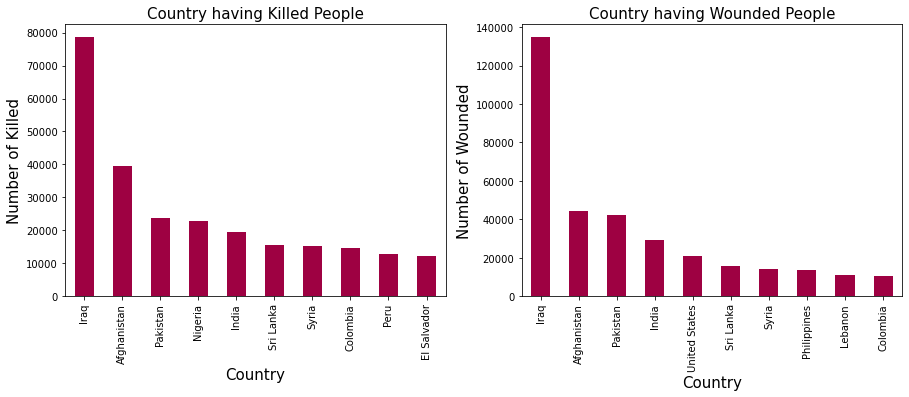

In [29]:
# Analysing countrywise people killed:

plt.subplot(1,2,2)
df1.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap="Spectral")
plt.title('Country having Wounded People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

# Analysing countrywise people killed:

plt.subplot(1,2,1)
df1.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap="Spectral")
plt.title('Country having Killed People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

    Observation: 1. From the above figures we get to know that Iraq has 70000+ deaths, followed by Afghanistan having 
                    around 40000 deaths.
                 2. More wounded people are again in Iraq having 120000+ wounded people followed by Afghanistan around 
                    40000+ and then Pakistan and so on
                 3. From this we can observe that country Iraq has more number of killed as well as wounded people.

#### Terrorists Groupwise analysis 

Text(0, 0.5, 'Groups of Terrorists')

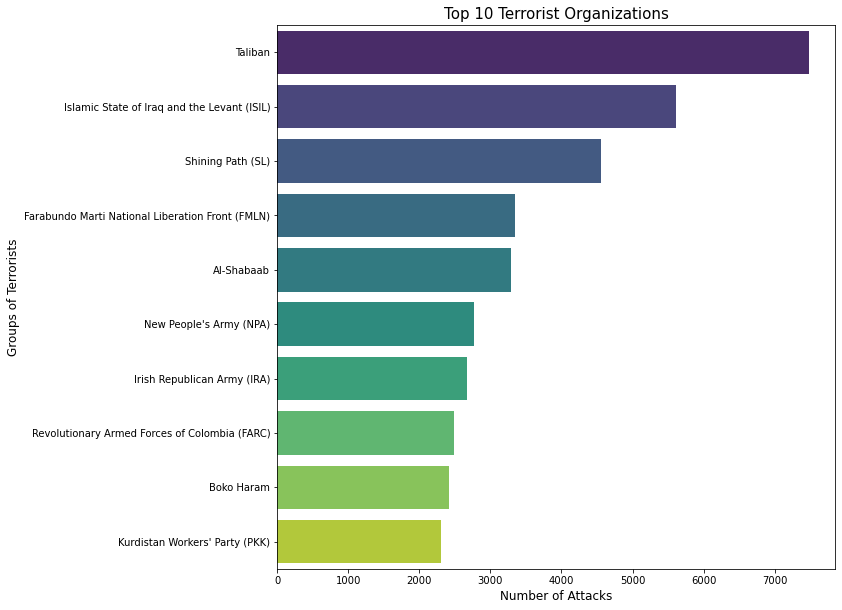

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(df1['Group'].value_counts()[1:11].values, df1['Group'].value_counts()[1:11].index,palette='viridis')
plt.title('Top 10 Terrorist Organizations',fontsize=15)
plt.xlabel('Number of Attacks',fontsize=12)
plt.ylabel('Groups of Terrorists',fontsize=12)

    Observation:  Taliban tops the list of the top 10 terrorist organization, followed by ISIL

In [31]:
# Let us analyse how many attacks Taliban has made over the years:
#This can be done graphically by grouping Taliban and storing the group in the new variable df1_tal

df1_tal = df1[df1["Group"]=="Taliban"]

In [32]:
df1_tal

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attacktype,Killed,Wounded,target,summary,Group,target_type,Weapon_type
59040,1995,4,20,Afghanistan,Unknown,South Asia,Unknown,NaN,NaN,Hostage Taking (Kidnapping),0,0,Federal Investigation Agency,NaN,Taliban,Police,Unknown
60014,1995,8,3,Afghanistan,Kandahar,South Asia,Kandahar,31.631083,65.742226,Hijacking,0,0,Russian Il-76 Cargo Aircraft,NaN,Taliban,Airports & Aircraft,Explosives
60462,1995,9,21,Afghanistan,Kandahar,South Asia,Kandahar,31.631083,65.742226,Hijacking,0,0,Boeing 727,NaN,Taliban,Airports & Aircraft,Explosives
60786,1995,10,25,Afghanistan,Kabul,South Asia,Kabul,34.516895,69.147011,Bombing/Explosion,0,0,ICRC- Chartered Aircraft,NaN,Taliban,Airports & Aircraft,Explosives
71682,2001,1,7,Afghanistan,Bamyan,South Asia,Yakawlang,34.733333,66.966667,Armed Assault,150,0,Civilians living in the vicinity of Yakawlang,1/7/2001: Taliban militia regained control of ...,Taliban,Private Citizens & Property,Firearms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181600,2017,12,28,Afghanistan,Nangarhar,South Asia,Ghani Khel district,34.195782,70.787483,Unknown,4,0,Fifth Brigade Officers,12/28/2017: Assailants attacked border police ...,Taliban,Police,Unknown
181619,2017,12,28,Afghanistan,Ghazni,South Asia,Ghazni,33.542622,68.415329,Unknown,3,1,Police Checkpoint,12/28/2017: Assailants attacked a police check...,Taliban,Police,Unknown
181651,2017,12,30,Afghanistan,Uruzgan,South Asia,Khas Uruzgan district,32.932938,66.689238,Unknown,11,15,Checkpoints,12/30/2017: Assailants attacked security check...,Taliban,Military,Unknown
181676,2017,12,31,Afghanistan,Logar,South Asia,Mohammad Agha district,34.217806,69.109316,Bombing/Explosion,5,0,Vehicle,12/31/2017: An explosive device detonated targ...,Taliban,Police,Explosives


Text(0, 0.5, 'Number of Attacks')

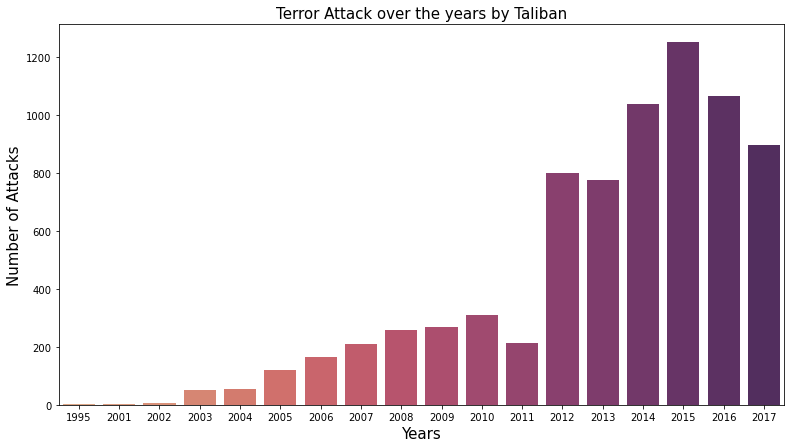

In [33]:
# Let us plot the attacks over the years made by Taliban:

plt.figure(figsize = (13,7))
sns.barplot(df1_tal['Year'].value_counts().index,df1_tal['Year'].value_counts().values, palette = 'flare')
plt.title('Terror Attack over the years by Taliban',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)

Observation: From the above figure we could observe that since 2014 there is a spike in the number of attacks by Taliban.

## Conclusion

Insights that can be drawn after doing Exploratory data analysis

1. Bombing/Explosion attack type is more, followed by armed assault and so on
2. Iraq is the most affected by terrorism, followed by Pakistan, Afghanistan and so on
3. The most targeted people are Private citizens and property,followed by military,police and so on
4. Top attacked regions are Middle East & North Africa followed by South Asia
5. The top attacked state is Baghdad followed by Northern Ireland
6. Explosives and Firearms are used more wherein 51% is of explosives and around 32% firearms
7. More number of attacks have taken place after 2012
8. The number of deaths have increased after 2013. More than 25000+ people died in the attack
9. The regions of Middle East & North Africa are the most killed and wounded followed by South-Asia and Sub-Saharan Africa
10. Iraq has 70000+ deaths, followed by Afghanistan having around 40000 deaths.
11. More wounded people are again in Iraq having 120000+ wounded people followed by Afghanistan around 40000+ and then Pakistan     and so on
12. From this we can observe that country Iraq has more number of killed as well as wounded people.
13. Taliban tops the list of the top 10 terrorist organization, followed by ISIL
14. since 2014 there is a spike in the number of attacks by Taliban.